# Assignment 1 - Exercise 8

We use the `gplearn` library (available via PyPI) for Genetic Programming. It provides a SciKit-Learn-like model API that allows us to define a `SymbolicRegressor` model for function approximation. The optimization can be initialized with a simple `.fit()` call as known from SK Learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness

In [2]:
# Hardcode the data
x = np.arange(-1.0, 1.1, 0.1)
y = np.array([0.,-0.1629,-0.2624,-0.3129,-0.3264,-0.3125,-0.2784,-0.2289,-0.1664,-0.0909,0.0,0.1111,0.2496,0.4251,0.6496,0.9375,1.3056,1.7731,2.3616,3.0951,4.0000])

In [3]:
# Reshape x to bring it into proper shape for model
x = np.reshape(x, (-1,1))

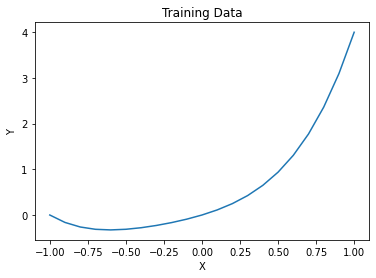

In [4]:
# Plot the training data out of curiosity
plt.plot(x, y)
plt.title('Training Data')
plt.xlabel('X');plt.ylabel('Y')
plt.show()

In [5]:
# Make exponential function to be used by Regressor
# as it is not defined as default function
def _exp(x1):
    e = np.exp(x1)
    # Convert NaNs to infinity, since otherwise overflows
    # are encountered during model fitting. Infinity is
    # a suitable replacement for optimization problems
    # where a lower score is better; otherwise choose 0.
    return np.nan_to_num(e, nan=float("inf"))

# `make_function` is from the gplearn API and provides a
# Function object that can be passed to the function set
# argument of `SymbolicRegressor`
exp = make_function(function=_exp,
                    name='exp',
                    arity=1)

In [ ]:
# Create sum of absolute error function
# to be used as custom metric
def _sae(y, y_pred, w):
    """ The sum absolute error between y and y_pred """
    return np.sum(np.abs(y-y_pred)*w)

# `make_fitness` is from the gplearn API and provides a
# Fitness object that can be passed to the metric
# argument of `SymbolicRegressor`
sae = make_fitness(_sae, greater_is_better=False)

In [6]:
# The following are helper functions to plot training progress as well as results/scores

def plot_fit_versus_data(reg):
    """ Plot the fitted model prediction against the actual data """
    plt.title('Fit vs. actual data')
    plt.plot(x, y, label='true data')
    plt.plot(x, reg.predict(x), label='approximation', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
def plot_evolution(reg):
    """ Plot length and fitness of best individual over generations """
    best_lengths = reg.run_details_['best_length']
    best_fitness = reg.run_details_['best_fitness']
    generations = reg.run_details_['generation']
    plt.title('Fitness and length of best individual over generations')
    plt.plot(generations, best_lengths, label='Best length')
    plt.plot(generations, best_fitness, label='Best fitness')
    plt.xlabel('Generation')
    plt.ylabel(' ')
    plt.legend()
    plt.show()
    
def eval_model(reg):
    """ Collect and display useful information on model fit """
    # Print the found program
    print('Final Program:\n',reg._program)
    print()
    # Print final Sum Absolute Error (used as metric)
    print('Sum Absolute Error: {:.2f}'.format(_sae(y, reg.predict(x),1)))
    # Print R² as additional informative metric
    print('R² Score: {:.2f}'.format(reg.score(x,y)))
    # Show informative plots (defined above)
    plot_fit_versus_data(reg)
    plot_evolution(reg)

In [ ]:
## Set the hyperparameters for the fit as taken from the assignment

population_size = 1000
# Note here that `exp` is not provided as a build in function. Thus we use
# our previously defined custom exponential function object
func_set = ('add','sub','mul','div','log','sin','cos',exp)
n_generations = 50
p_crossover = 0.7
p_mutation = 0.0
# Use the previously defined custom metric
metric = sae

In [ ]:
## Initialize the regression model using the hyperparameters

reg = SymbolicRegressor(
    population_size = population_size,
    generations = n_generations,
    p_crossover = p_crossover,
    p_subtree_mutation=p_mutation, # three different types
    p_hoist_mutation=p_mutation,   # of mutation, but all
    p_point_mutation=p_mutation,   # with probability 0
    function_set = func_set,
    metric=sae,
    verbose = 1
)

In [13]:
## Fit the model on the provided data

reg = reg.fit(x, y)

# Please note that it's possible that the process will encounter overflows for some of the 
# symbolic functions, and that the fitness can reach infinity. However, this does not hinder
# the optimization process, as we actually want to decrease the SAE

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


<ipython-input-5-954cc93d03d7>:5: RuntimeWarning: overflow encountered in exp
  e = np.exp(x1)
/home/pscl/scienv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


   0    15.74              inf        5          5.45326              N/A     27.83s
   1    12.56          514.381       14          4.52811              N/A     28.38s
   2    11.11          881.071       13          2.56948              N/A     24.75s
   3    10.41           13.318       17          2.54729              N/A     25.63s
   4    15.38          10705.8       17          1.12842              N/A     26.60s
   5    13.85          27144.2       17          1.12842              N/A     25.85s
   6    16.77          15443.9       14          1.12662              N/A     28.18s
   7    17.35          10.1801       18         0.981267              N/A     25.82s
   8    16.26          10.5884       18         0.981267              N/A     25.63s
   9    15.65           10.065       18         0.981267              N/A     24.23s
  10    17.26          10.1662       18         0.981267              N/A     23.84s
  11    16.62          8.48842       18         0.981267         

Final Program:
 sub(exp(X0), cos(add(mul(sub(exp(sin(X0)), cos(X0)), X0), mul(X0, X0))))

Sum Absolute Error: 0.98
R² Score: 0.99


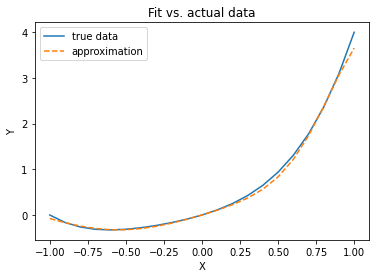

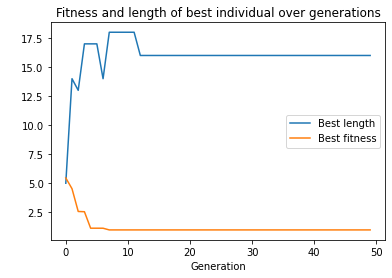

In [14]:
# Evaluate model and show plots
eval_model(reg)

**Question:** 

Can you observe any undesirable phenomenon from these plots? In case of positive
answer, how would you try to overcome the related problem (you can refer to the
literature).

**Answer:**

Yes, we can observe an undesirable phenomenon. First and foremost, it is evident that the algorithm quickly gets stuck in a local optimum. For almost all runs, it usually takes less that 10 generations until the algorithm does not improve upon the best individual anymore (as can be seen by the flattening out of both best length and best fitness functions). We reason that this is mainly due to the fact that the algorithm does not employ any randomness due to a mutation rate of 0. It thus has no good chances to escape a local optimum once it found a reasonable solution. To overcome this, we propose to introduce mutations to the algorithm, which is the main driver for selectively favouring exploration versus exploitation behaviour in such a system.

Furthermore, we note that the dataset only contains few data points, and the selected interval is very small (20 datapoint in [-1,1]). It is very hard to find the true general function given only such a small snapshot of its data, as there are many possible functions that can approximate the true function in this interval reasonably well. To improve upon this, it would be beneficial to sample a wider interval of the true function.